# GPT series


| モデル | 公開年 | パラメータ数 | データサイズ | 備考                                              |
| ------ | ------ | ------------ | ------------ | ------------------------------------------------- |
| GPT-1  | 2018   | 1.2億        | 5GB          | 自己教師あり事前学習＋fine-tuning                 |
| GPT-2  | 2019   | 15億         | 40GB         | 文章生成以外は性能が低め                          |
| GPT-3  | 2020   | 1750億       | 570GB        | promptによる追加学習（in-context learning）の提案 |
| GPT-4  | 2023   | 非公開       | 非公開       | マルチモーダル（画像も処理できる）                |



## GPT

- [Radford, A., Narasimhan, K., Salimans, T., & Sutskever, I. (2018). Improving language understanding by generative pre-training.](https://www.cs.ubc.ca/~amuham01/LING530/papers/radford2018improving.pdf)
- モデルはデコーダー型Transformer（[[1801.10198] Generating Wikipedia by Summarizing Long Sequences](https://arxiv.org/abs/1801.10198)）
- 次の単語を予測する問題として事前学習
  - BERTのようにタスクに合わせて教師あり学習でFine-tuningする
- このあとにBERTが出て注目されにくかった模様




## GPTのTransformer

デコーダー型Transformer（[[1801.10198] Generating Wikipedia by Summarizing Long Sequences](https://arxiv.org/abs/1801.10198)）

前処理

$$
h_0 = U W_e + W_p
$$

- $U = (u_{-k}, \dots, u_{-1})$：トークンの文脈ベクトルたち
- $W_e$: token embedding matrix
- $W_p$: potision embedding matrix



**Text & Position Embedding**

- text embedding
  - 少なくともEncoder-Decoder型のTransformerでは、ここの単語埋め込みも他のパラメータと同時に学習される
- position embedding


**Masked Multi Self Attention**

- Masked: 次の単語予測
- Multi: データを分割して複数のAttentionで評価

**residual conneciton**

1つ前の層の結果を現在の層の出力結果に足し合わせる処理

$l$番目のレイヤーの入力を$\boldsymbol{p}^{(l)}_t$、出力を$\boldsymbol{o}^{(l)}_t$とすると、残差結合では

$$
\boldsymbol{p}^{(l)}_t = \boldsymbol{o}^{(l)}_t + \boldsymbol{p}^{(l-1)}_t
$$

**Layer Norm**

Layer Normalizationは、学習中に過剰に値が大きくならないようにベクトルの各要素を正規化する（[[1607.06450] Layer Normalization](https://arxiv.org/abs/1607.06450)）


スケールを調整するパラメータ$\boldsymbol{a} = (a_1, \dots, a_d)^\top$と平行移動を調整する$\boldsymbol{b} = (b_1, \dots, b_d)^\top$を用いて$\boldsymbol{x}$を$\boldsymbol{x}'$に変換する。

$$
x'_k = a_k
\left(
    \frac{ x_k - \mu_{\boldsymbol{x}} }
    { \sigma_{\boldsymbol{x}} + \epsilon }
    + b_k
\right)
$$

ここで

$$
\mu_{\boldsymbol{x}} = \frac{1}{d} \sum_{k=1}^d x_k\\
\sigma_{\boldsymbol{x}} = \sqrt{ \frac{1}{d} \sum_{k=1}^d (x_k - \mu_{\boldsymbol{x}})^2 }
$$

**Feed Forward**

DNNだが

- 中間層は入力層の4倍程度大きくすることが多い
- 系列ではなく入力位置ごと（position-wise）に計算する

という違いが有る

$i$番目の隠れベクトルを$h_i$とすると

$$
\hat{h}_i = W_2 h'_i + b_2\\
h'_i = f(W_1 h_i + b_1)
$$



## GPT-2

[Language Models are Unsupervised Multitask Learners](https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)

- GPTとほとんど同じモデル
- データは新たに作ったWebTextデータセットで、数百万のテキスト
- fine-tuneしないzero-shot learningが可能
    - Whenconditioned on a document plus questions, the answers generated by the language model reach 55 F1 on the CoQA dataset
    - achieves state of the art results on 7 out of 8 tested language modeling datasets in a zero-shot settingbut still underfits WebText.
      - ゼロショットの設定では7/8のデータセットでSOTAだが、まだ学習不足
    - まだまだ性能は低いが可能性は見た、という感じ
- 文章生成以外はパフォーマンスが低い？


## GPT-3

- arXiv: [[2005.14165] Language Models are Few-Shot Learners](https://arxiv.org/abs/2005.14165)
- Github: [openai/gpt-3: GPT-3: Language Models are Few-Shot Learners](https://github.com/openai/gpt-3)
- GPT2と同じモデル


### in-context learning

promptによってモデルの振る舞いを変える・新たなタスクに適応させるという考え方

例示の数に応じてzero-shotやfew-shotに分かれる

→ prompt engineeringの考え方はこれがベース

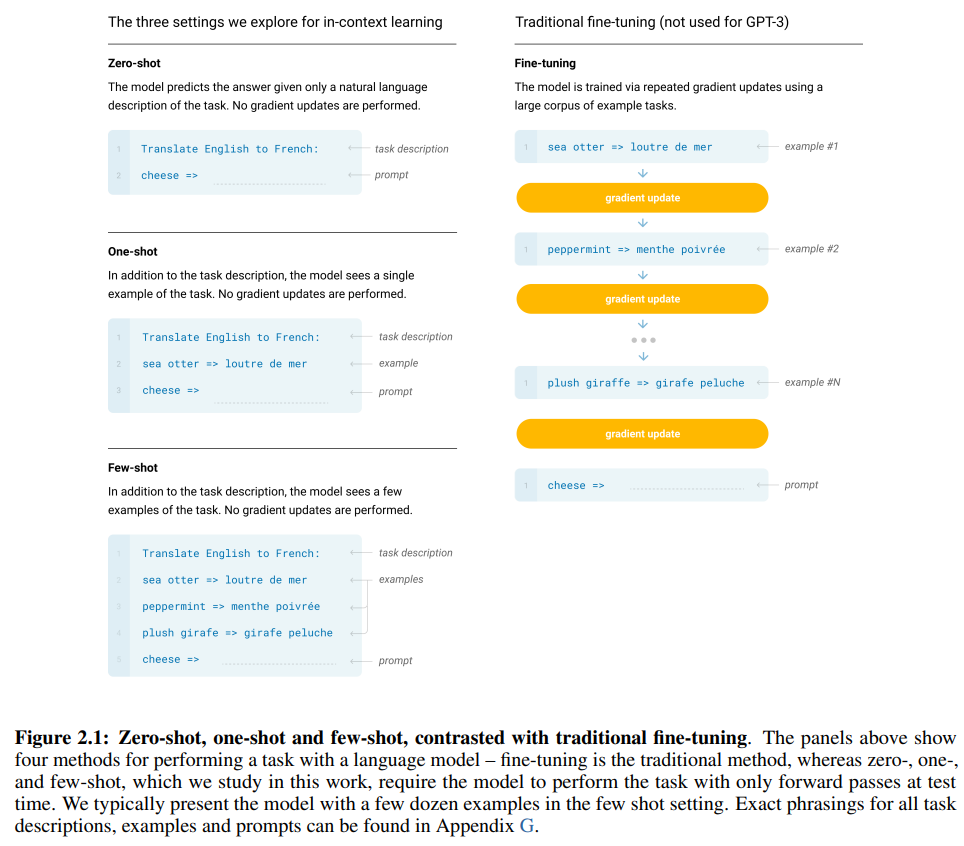

## GPT-4

[[2303.08774] GPT-4 Technical Report](https://arxiv.org/abs/2303.08774)